In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import keras

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
  './data',
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size=(224, 224),
  #batch_size=batch_size
  )

Found 826 files belonging to 7 classes.
Using 661 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-18 18:11:17.981218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-18 18:11:17.981523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
val_ds = keras.utils.image_dataset_from_directory(
  './data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  #batch_size=batch_size
  )

Found 826 files belonging to 7 classes.
Using 165 files for validation.


In [4]:
class_names = train_ds.class_names

2023-02-18 18:11:46.734267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


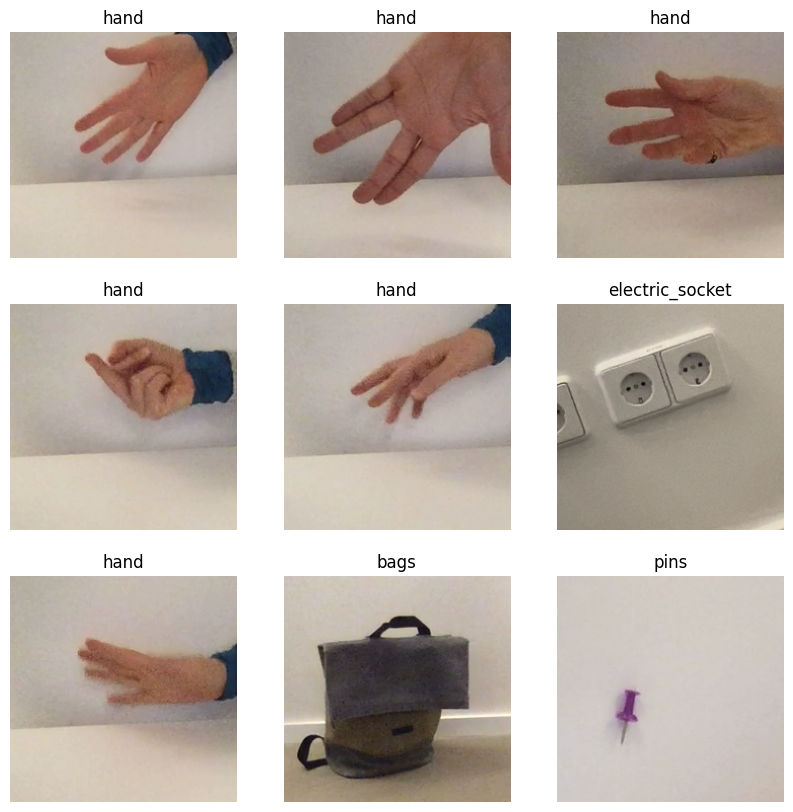

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images[i].shape)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# define the keras model
keras.backend.clear_session()
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2), strides=2),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2), strides=2),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

num_classes = 7

model = keras.Sequential([
  keras.Input(shape=(224,224,3)),
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation="softmax")
])

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [8]:
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(
  optimizer = 'adam',
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9

In [13]:
#keras.preprocessing.image.load_img()
#tf.keras.preprocessing.image.img_to_array

In [11]:
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', #the thing we are monitoring
    mode = 'min',
    min_delta = 0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience = 5, #number of epochs with no improvement needed for the model to stop
    verbose = 1, #0 is silent, 1 means a message is displayed when something happens
    restore_best_weights = True,
)

In [12]:
hist = model.fit(
  train_ds,
  validation_data = val_ds,
  callbacks = [early_stop],
  epochs = 100,
  #validation_split = 0.1,
  #batch_size = 64,
)

Epoch 1/100


/Users/jrdonoso/miniforge3/envs/neural_nets/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-02-18 18:13:56.394932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.5915

2023-02-18 18:13:59.470073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 4s 92ms/step - loss: 1.2313 - accuracy: 0.5915 - val_loss: 0.6389 - val_accuracy: 0.7697
Epoch 2/100
21/21 [==============================] - 2s 72ms/step - loss: 0.3820 - accuracy: 0.8820 - val_loss: 0.2071 - val_accuracy: 0.9515
Epoch 3/100
21/21 [==============================] - 1s 67ms/step - loss: 0.1662 - accuracy: 0.9561 - val_loss: 0.2629 - val_accuracy: 0.8970
Epoch 4/100
21/21 [==============================] - 2s 73ms/step - loss: 0.1464 - accuracy: 0.9607 - val_loss: 0.2422 - val_accuracy: 0.8970
Epoch 5/100
21/21 [==============================] - 1s 67ms/step - loss: 0.0802 - accuracy: 0.9788 - val_loss: 0.2483 - val_accuracy: 0.9030
Epoch 6/100
21/21 [==============================] - 1s 67ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.1845 - val_accuracy: 0.9515
Epoch 7/100
21/21 [==============================] - 2s 72ms/step - loss: 0.0185 - accuracy: 0.9985 - val_loss: 0.2188 - val_accuracy: 0.9455
Epoch 8/100
21/21 

In [14]:
import pandas as pd

<AxesSubplot: >

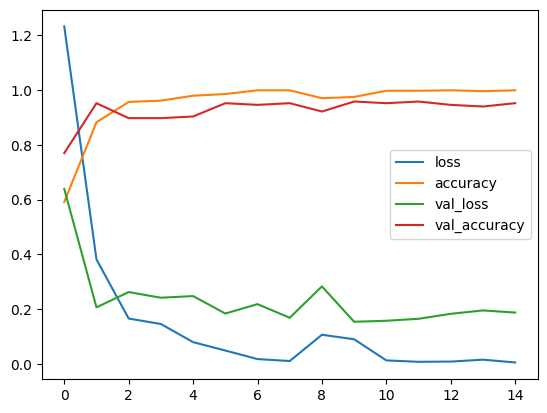

In [15]:
pd.DataFrame(hist.history).plot()

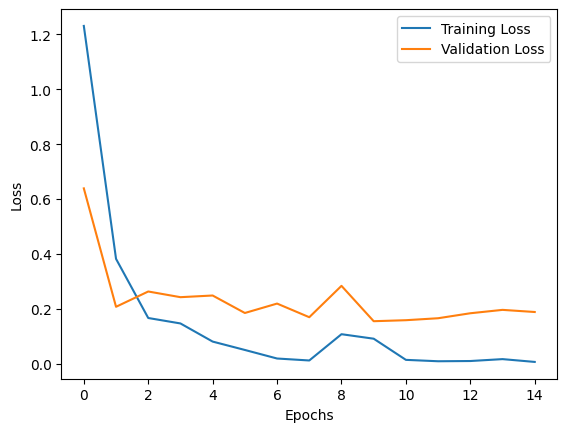

In [16]:
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

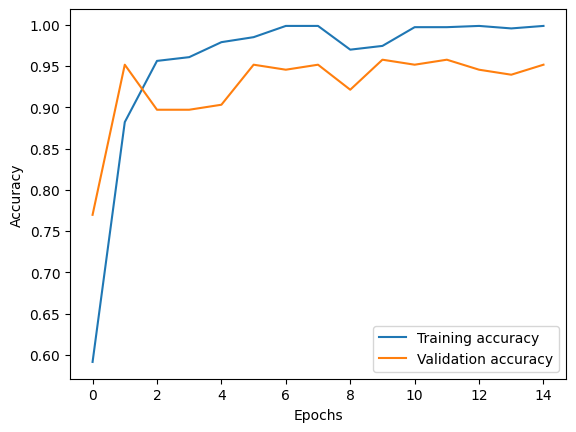

In [17]:
plt.plot(hist.history['accuracy'], label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [80]:
model.save('model_objects.h5')

In [104]:
model.layers[1]

In [102]:
kernels = model.layers[1].kernel

In [93]:
kernels.shape

TensorShape([3, 3, 3, 32])

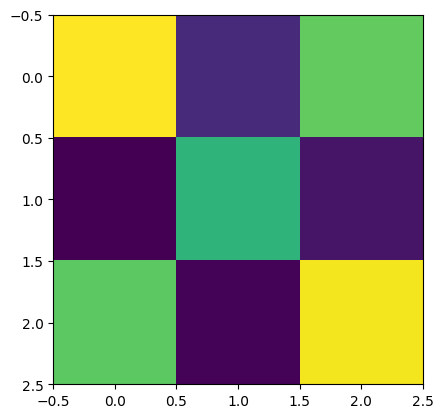

In [99]:
plt.imshow(kernels[:,:,0,0])